In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import scipy
import emcee
import corner
import lalsimulation as ls

In [13]:
import h5py

In [14]:
f = h5py.File('./test_run.h5', 'r')

In [21]:
samples = np.genfromtxt('./test_run_samples.txt')

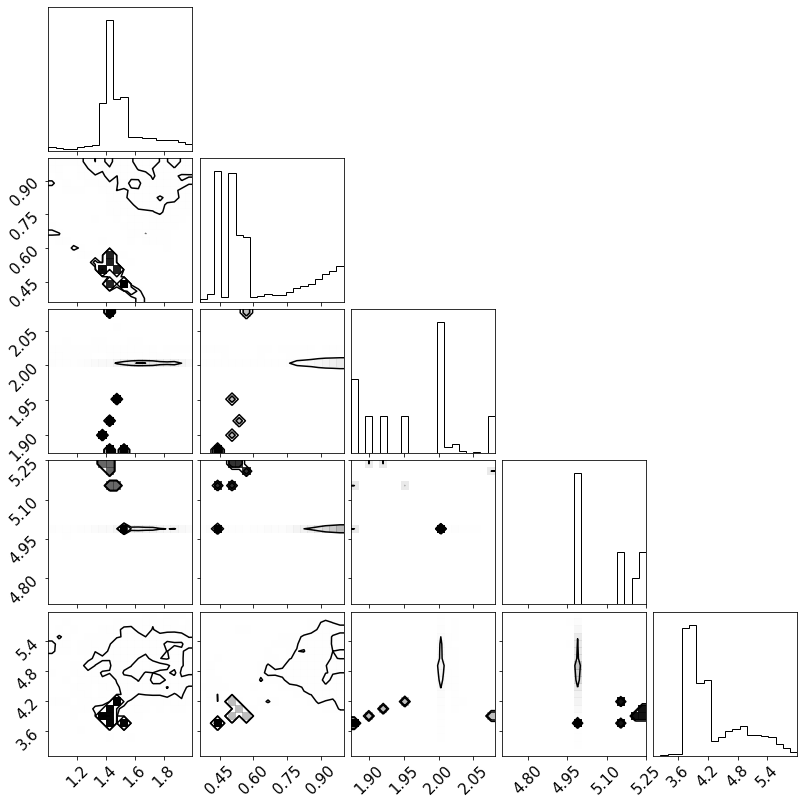

In [31]:
corner.corner(samples, plot_datapoints=False);

In [117]:
%load_ext autoreload
%autoreload 2
import snr_calculation as s 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
ms, osnrs = s.optimal_snr_grid(1, 30, a1z = 0.0, a2z = 0.0, psd_fn = ls.SimNoisePSDaLIGOLateHighSensitivityP1200087)
np.savetxt('./nospin_snrgrid_LH.txt', osnrs)
np.savetxt('./nospin_mgrid_LH.txt', ms)

In [ ]:
ms, osnrs = s.optimal_snr_grid(1, 30, a1z = 0.0, a2z = 0.0, psd_fn = ls.SimNoisePSDaLIGOEarlyHighSensitivityP1200087)
np.savetxt('./nospin_snrgrid_EH.txt', osnrs)
np.savetxt('./nospin_mgrid_EH.txt', ms)

In [ ]:
ms, osnrs = s.optimal_snr_grid(1, 30, a1z = 0.0, a2z = 0.0, psd_fn = ls.SimNoisePSDaLIGODesignSensitivityP1200087)
np.savetxt('./nospin_snrgrid_D.txt', osnrs)
np.savetxt('./nospin_mgrid_D.txt', ms)

In [ ]:
ms, osnrs = s.optimal_snr_grid(1, 30, a1z = 0.0, a2z = 0.0, psd_fn = ls.SimNoisePSDaLIGOMidHighSensitivityP1200087)
np.savetxt('./nospin_snrgrid_MH.txt', osnrs)
np.savetxt('./nospin_mgrid_MH.txt', ms)

In [ ]:
ms, osnrs = s.optimal_snr_grid(1, 20, a1z = 1.0, a2z = 1.0, psd_fn = ls.SimNoisePSDaLIGODesignSensitivityP1200087)
np.savetxt('./nospin_snrgrid_D.txt', osnrs)
np.savetxt('./nospin_mgrid_D.txt', ms)

In [ ]:
ms, osnrs = s.optimal_snr_grid(1, 30, a1z = 0.0, a2z = 0.0, psd_fn = ls.SimNoisePSDaLIGOAPlusDesignSensitivityT1800042)
np.savetxt('./nospin_snrgrid_AP.txt', osnrs)
np.savetxt('./nospin_mgrid_AP.txt', ms)

In [161]:
ms = np.genfromtxt('./nospin_mgrid_EH.txt')
osnrs = np.genfromtxt('./nospin_snrgrid_EH.txt')
snr, interp = s.snr_sourceframe_from_grid(np.array([10]), np.array([10]), np.array([0.01]), ms, osnrs)
injection_set = p.create_injection_set(1000, p.generate_injection, interp, threshold=8)
np.savetxt('./threshold_8_injections_EH.txt', injection_set)
injection_set = p.create_injection_set(1000, p.generate_injection_bns, interp, threshold=8)
np.savetxt('./threshold_8_bns_injections_EH.txt', injection_set)

In [167]:
ms = np.genfromtxt('./nospin_mgrid_LH.txt')
osnrs = np.genfromtxt('./nospin_snrgrid_LH.txt')
snr, interp = s.snr_sourceframe_from_grid(np.array([10]), np.array([10]), np.array([0.01]), ms, osnrs)
injection_set = p.create_injection_set(1000, p.generate_injection, interp, threshold=8)
np.savetxt('./threshold_8_injections_LH.txt', injection_set)
injection_set = p.create_injection_set(1000, p.generate_injection_bns, interp, threshold=8)
np.savetxt('./threshold_8_bns_injections_LH.txt', injection_set)

In [168]:
ms = np.genfromtxt('./nospin_mgrid_D.txt')
osnrs = np.genfromtxt('./nospin_snrgrid_D.txt')
snr, interp = s.snr_sourceframe_from_grid(np.array([10]), np.array([10]), np.array([0.01]), ms, osnrs)
injection_set = p.create_injection_set(1000, p.generate_injection, interp, threshold=8)
np.savetxt('./threshold_8_injections_D.txt', injection_set)
injection_set = p.create_injection_set(1000, p.generate_injection_bns, interp, threshold=8)
np.savetxt('./threshold_8_bns_injections_D.txt', injection_set)

In [169]:
ms = np.genfromtxt('./nospin_mgrid_AP.txt')
osnrs = np.genfromtxt('./nospin_snrgrid_AP.txt')
snr, interp = s.snr_sourceframe_from_grid(np.array([10]), np.array([10]), np.array([0.01]), ms, osnrs)
injection_set = p.create_injection_set(10000, p.generate_injection, interp, threshold=8)
np.savetxt('./threshold_8_injections_AP.txt', injection_set)
injection_set = p.create_injection_set(10000, p.generate_injection_bns, interp, threshold=8)
np.savetxt('./threshold_8_bns_injections_AP.txt', injection_set)

In [178]:
p.set_detector("EarlyHigh")

In [158]:
injection_set

array([[1.66245965, 1.24412181],
       [1.02842803, 1.01626742],
       [1.38132118, 1.00193918],
       ...,
       [1.57704193, 1.31748769],
       [2.26117121, 2.01790781],
       [1.84342312, 1.45540823]])

In [153]:
test = []
for i in range(1000):
    test.append(p.generate_injection_bns())
test = np.array(test)

In [70]:
snr, interp = s.snr_sourceframe_from_grid(np.array([10]), np.array([10]), np.array([0.01]), ms, osnrs)
injection_set = p.create_injection_set(10000, generate_injection_bns, interp, threshold=12)

In [71]:
np.savetxt('./threshold_12_bns_injections.txt', injection_set)

In [139]:
np.savetxt('./threshold_0_injections.txt', injection_set)

In [ ]:
# injection_set = np.genfromtxt('./threshold_12_injections.txt')
test.selection_norm([0.63, 1.35, 0.07, 1.85, 0.35, 2, 1, 3, 5, 4], injection_set)

In [2]:
import astropy.cosmology as cosmo
import astropy.units as u

In [38]:
%timeit cosmo.z_at_value(cosmo.Planck15.luminosity_distance, 1*u.Gpc, 0, 1)

4.8 ms ± 1.45 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [40]:
cosmo.Planck15.luminosity_distance(2).to(u.Gpc)

<Quantity 15.93461564 Gpc>

In [3]:
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [6]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import populations as p

In [75]:
test = p.Population_One([1.4, 0.5, 2.0, 1, 3])

False


In [76]:
samples = test.get_population(100, False)

In [77]:
test.pop_like(samples, [1.4, 0.5, 2.0])

114.10518532460982

Text(0.5, 1.0, '$p(q) \\propto q^3$, Maximum $\\frac{j}{j_{kep}}$ = 1')

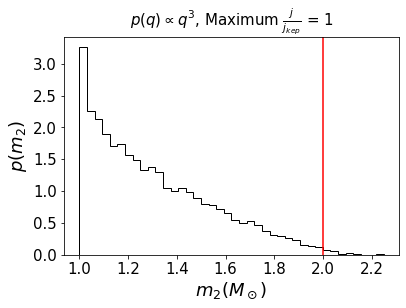

In [15]:
ax = plt.hist(samples[:,0,1], bins=40, density=True, histtype='step', color='k')
plt.axvline(2, c='r')
#plt.yscale('log')
plt.ylabel('$p(m_2)$')
plt.xlabel('$m_2 (M_\odot)$')
plt.title(r'$p(q) \propto q^3$, Maximum $\frac{j}{j_{kep}}$ = 1')

Text(0.5, 1.0, '$p(q) \\propto q^3$, Maximum $\\frac{j}{j_{kep}}$ = 1')

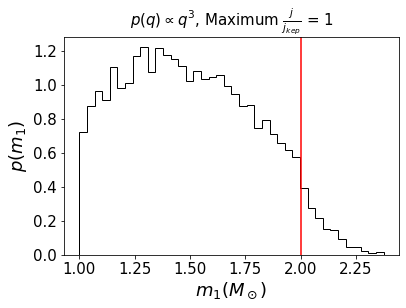

In [16]:
ax = plt.hist(samples[:,0,0], bins=40, density=True, histtype='step', color='k')
plt.axvline(2, c='r')
#plt.yscale('log')
plt.ylabel('$p(m_1)$')
plt.xlabel('$m_1(M_\odot)$')
plt.title(r'$p(q) \propto q^3$, Maximum $\frac{j}{j_{kep}}$ = 1')

In [67]:
test = p.Population_Two([0.63, 1.35, 0.07, 1.85, 0.35, 2, 1, 3])

vary slope: False
selection: False
spinning: False
no m1 spin: False
False


In [68]:
samples = test.get_population(10, False)

In [8]:
samples = test.get_population(10000, False)

In [69]:
%timeit test.pop_like(samples, [0.63, 1.35, 0.07, 1.85, 0.35, 2, 0.15])

653 µs ± 237 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
#%timeit 
pop_spin_mcmc_two_like(samples, [0.63, 1.35, 0.07, 1.85, 0.35, 2])

In [ ]:
posterior_samples, prob_samples = test.infer(samples, 500)

In [ ]:
prob_samples

Text(0.5, 1.0, '$p(q) \\propto q^3$, Maximum $\\frac{j}{j_{kep}}$ = 1')

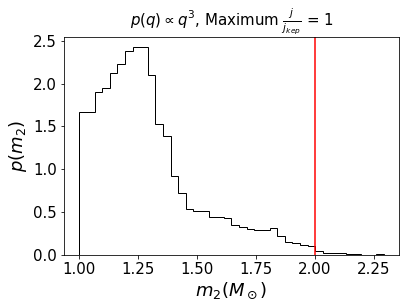

In [9]:
ax = plt.hist(samples[:,0,1], bins=40, density=True, histtype='step', color='k')
plt.axvline(2, c='r')
#plt.yscale('log')
plt.ylabel('$p(m_2)$')
plt.xlabel('$m_2 (M_\odot)$')
plt.title(r'$p(q) \propto q^3$, Maximum $\frac{j}{j_{kep}}$ = 1')

Text(0.5, 1.0, '$p(q) \\propto q^3$, Maximum $\\frac{j}{j_{kep}}$ = 1')

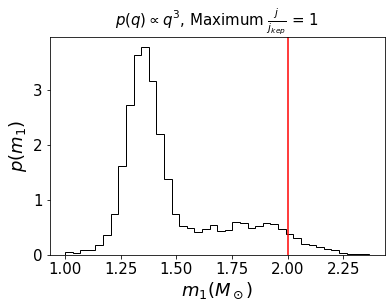

In [10]:
ax = plt.hist(samples[:,0,0], bins=40, density=True, histtype='step', color='k')
plt.axvline(2, c='r')
#plt.yscale('log')
plt.ylabel('$p(m_1)$')
plt.xlabel('$m_1(M_\odot)$')
plt.title(r'$p(q) \propto q^3$, Maximum $\frac{j}{j_{kep}}$ = 1')

In [60]:
test = p.Population([0.63, 1.35, 0.07, 1.85, 0.35, 2, 1, 3, 0.2], "two", False, [0.5])

vary slope: False
selection: [0.5]
spinning: False
no m1 spin: False


In [66]:
%timeit test.pop_like(samples, [0.63, 1.35, 0.07, 1.85, 0.35, 2])

40 ms ± 12.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [61]:
samples = test.get_population(10, False)

In [ ]:
a, b = test.infer(samples, 100, fixed={})

In [65]:
%timeit p.fix_params_one({}, False, False)

9.57 µs ± 2.98 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


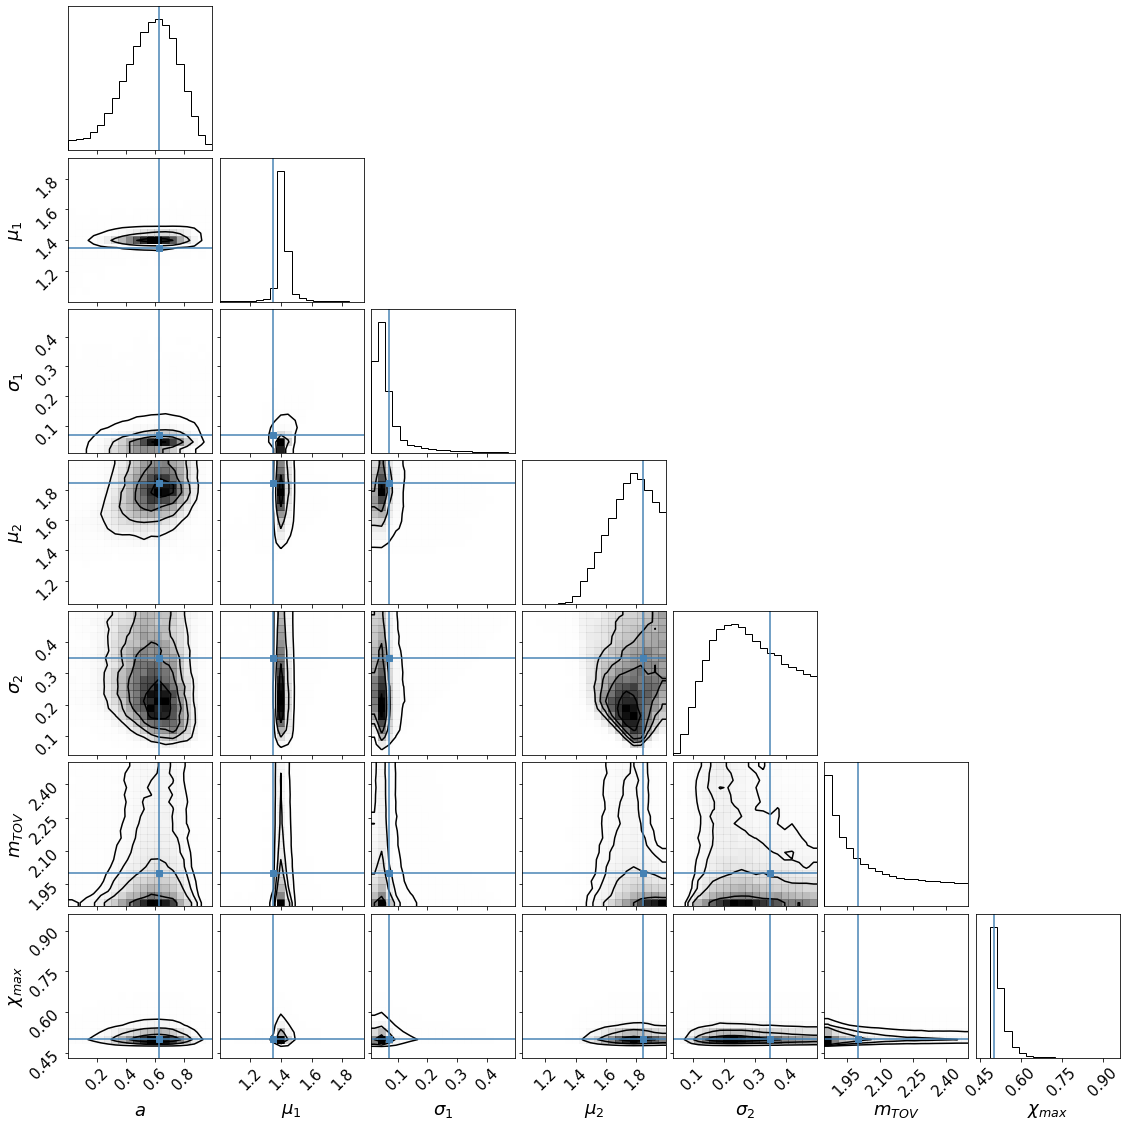

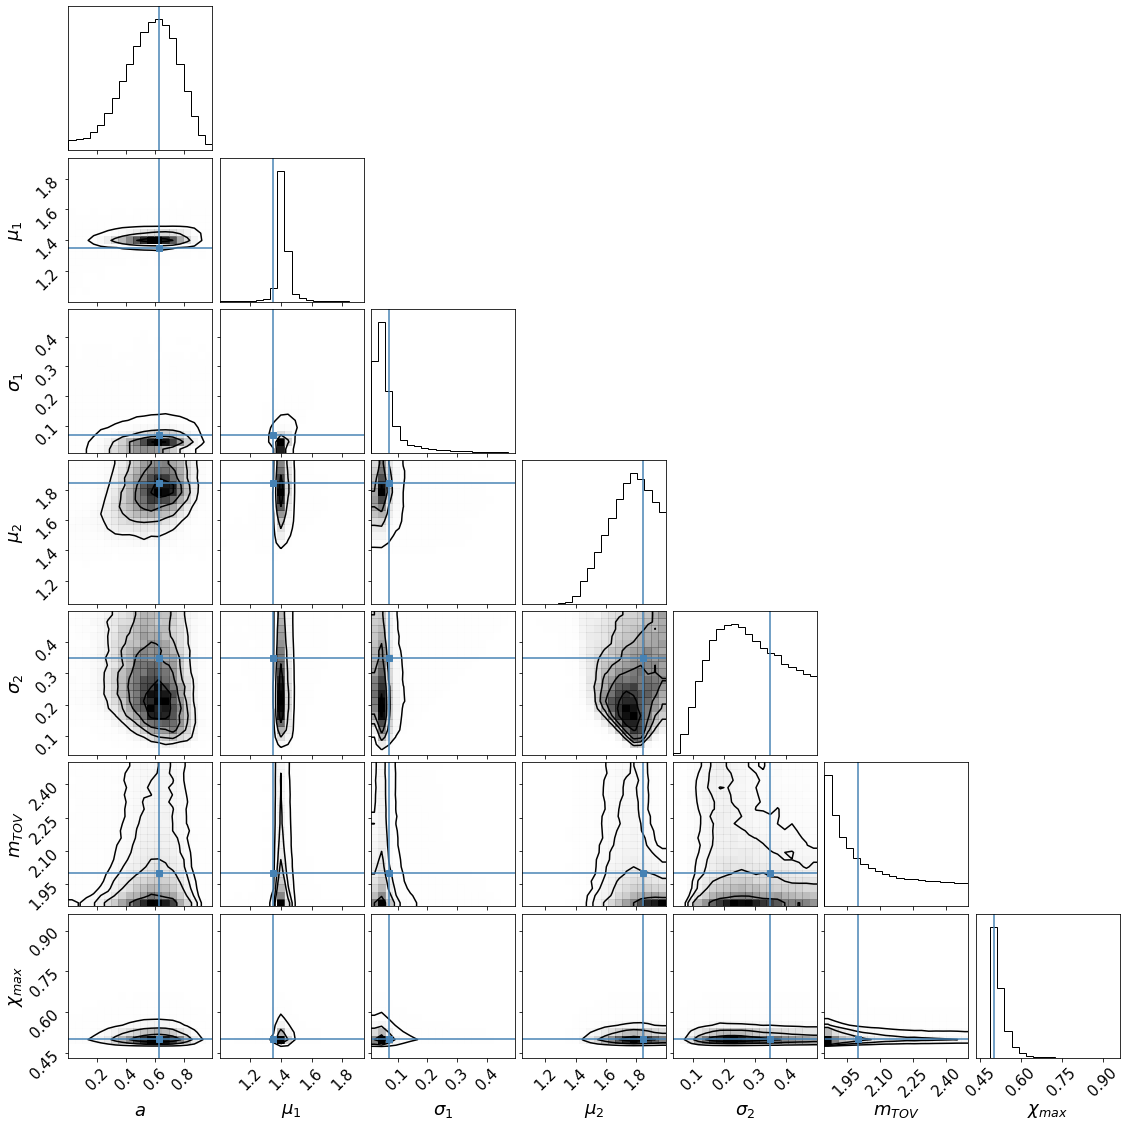

In [551]:
corner.corner(a, plot_datapoints=False, truths=[0.63, 1.35, 0.07, 1.85, 0.35, 2.0, 0.5], labels = ['$a$', '$\mu_1$', '$\sigma_1$', '$\mu_2$', '$\sigma_2$', '$m_{TOV}$', '$\chi_{max}$'])

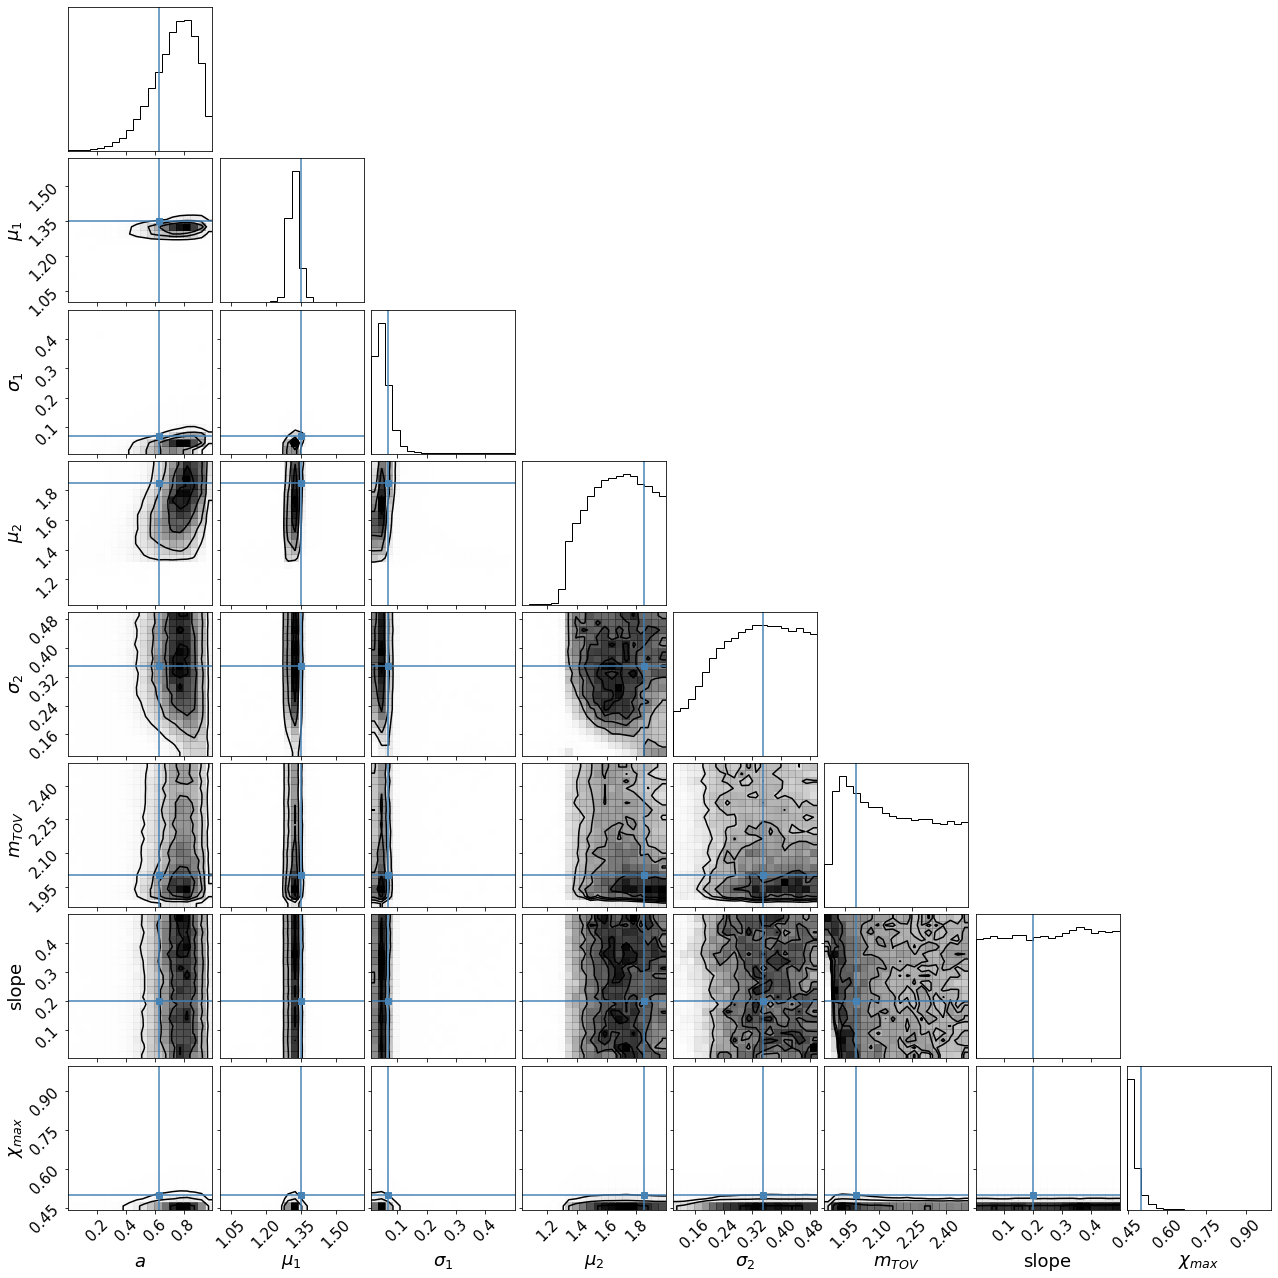

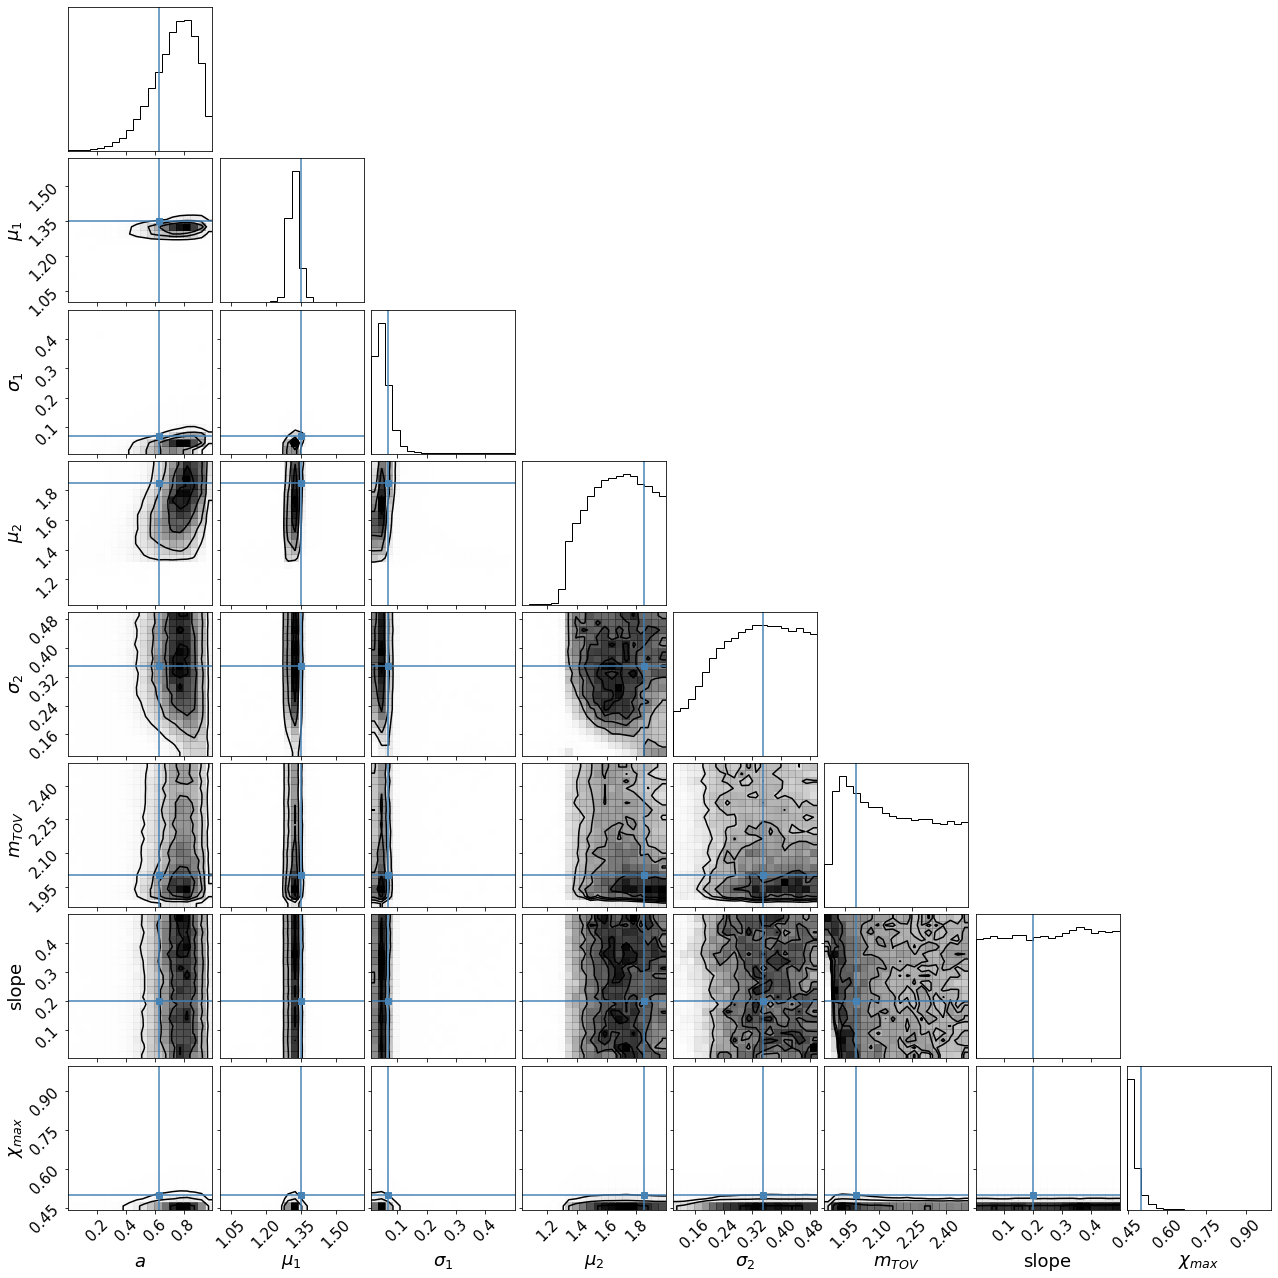

In [529]:
corner.corner(a[a[:,4]>0.1], plot_datapoints=False, truths=[0.63, 1.35, 0.07, 1.85, 0.35, 2.0, 0.2, 0.5], labels = ['$a$', '$\mu_1$', '$\sigma_1$', '$\mu_2$', '$\sigma_2$', '$m_{TOV}$', 'slope', '$\chi_{max}$'])

In [70]:
test = p.Population([1.35, 0.07, 2, 1, 3], 'one', False, spin_params = [0.5, 5.0], m1_nospin = True, spinning = True, selection=False)

vary slope: False
selection: False
spinning: True
no m1 spin: True


In [72]:
pop = test.get_population(10, False)

In [73]:
fixed = {
    "mu": 1.35,
}

In [74]:
a, b = test.infer(pop, 200, fixed=fixed)

/mnt/c/users/christine/gwcosmology/spin!!/populations.py:874: RuntimeWarning: divide by zero encountered in log
  result = np.sum([np.log(self.event_likelihood_one_single(i, params))/mu for i in samples])
100%|██████████| 200/200 [00:00<00:00, 345.31it/s]


In [87]:
test = p.Population([0.63, 1.35, 0.07, 1.85, 0.35, 2, 1, 3, 5, 4], 'two', False, spin_params = [0.5, 5.0], m1_nospin = True, spinning = True, selection=False)

vary slope: False
selection: False
spinning: True
no m1 spin: True


In [88]:
pop = test.get_population(10, samples=False)

In [89]:
a, b = test.infer(pop, 200, fixed=fixed)

  0%|          | 0/200 [00:00<?, ?it/s]

[[ 0.    1.  ]
 [ 1.    2.  ]
 [ 0.01  0.5 ]
 [ 1.    2.  ]
 [ 0.01  0.5 ]
 [ 1.5   2.5 ]
 [ 0.    1.  ]
 [-0.01  6.  ]] [0.05 0.1  0.05 0.1  0.05 0.1  0.05 0.2 ]


 58%|█████▊    | 117/200 [00:00<00:00, 188.81it/s]/mnt/c/users/christine/gwcosmology/spin!!/populations.py:119: RuntimeWarning: divide by zero encountered in double_scalars
  return a*phi(x,mu_1,sigma_1)/(normal_cdf(upper,mu_1,sigma_1)-normal_cdf(lower,mu_1,sigma_1))+(1-a)*phi(x,mu_2,sigma_2)/(normal_cdf(upper,mu_2,sigma_2)-normal_cdf(lower,mu_2,sigma_2))
/root/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
100%|██████████| 200/200 [00:01<00:00, 193.63it/s]


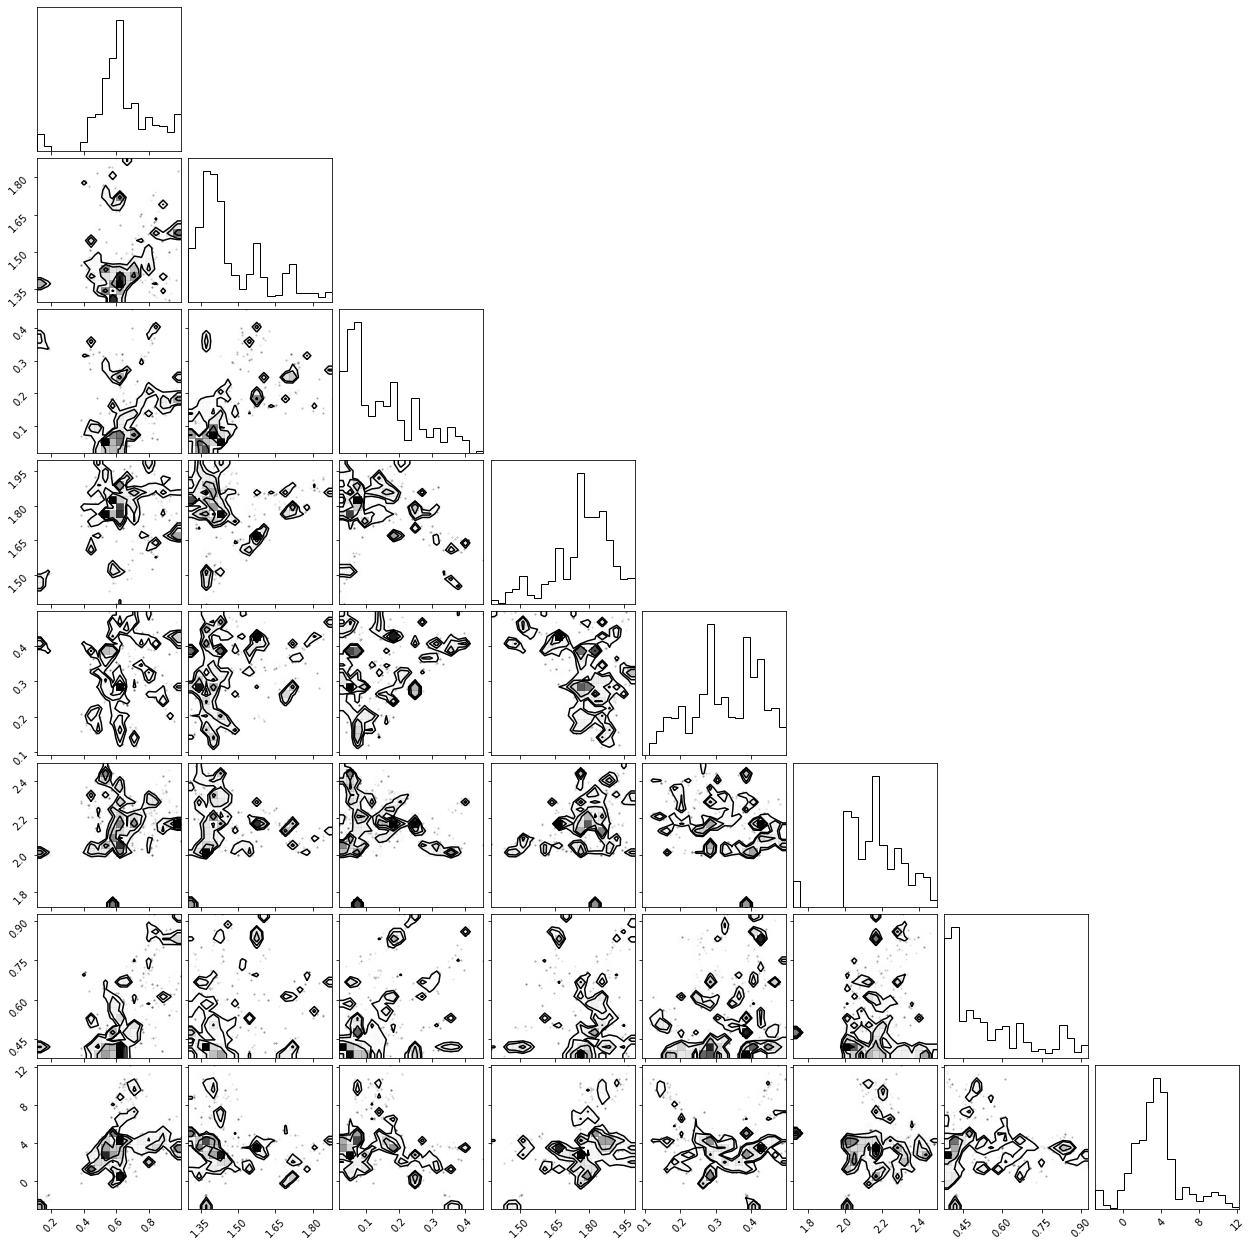

In [34]:
corner.corner(a, show_datapoints=False);

(array([29., 20., 15.,  7.,  9.,  6.,  4.,  5.,  3.,  2.]),
 array([0.00206763, 0.04955175, 0.09703587, 0.14451999, 0.19200412,
        0.23948824, 0.28697236, 0.33445648, 0.3819406 , 0.42942472,
        0.47690884]),
 <BarContainer object of 10 artists>)

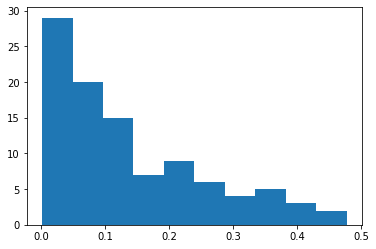

In [269]:
plt.hist(pop[:,:,3])

In [300]:
test.pop_like(pop, [0.63, 1.35, 0.07, 1.85, 0.35, 2, 5, 4, 0.5, 5.0])

-267.17983159495327

In [ ]:
test.infer(pop, 200)

In [329]:
fix_params_two(fixed)

(array([[ 0.  ,  1.  ],
        [ 1.34,  1.36],
        [ 0.01,  0.5 ],
        [ 1.  ,  2.  ],
        [ 0.01,  0.5 ],
        [ 1.5 ,  2.5 ],
        [ 0.  ,  0.5 ],
        [ 0.  ,  1.  ],
        [-0.01,  6.  ]]),
 array([0.05 , 0.001, 0.05 , 0.1  , 0.05 , 0.1  , 0.05 , 0.05 , 0.2  ]))

1.001090707954281

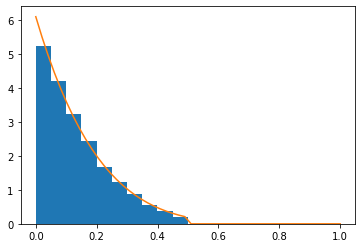

In [289]:
max_jjkep = 0.5
beta = 5
plt.hist(1 - p.generate_q(10000, beta = beta, m_1 = 1, m_min = 1-max_jjkep), density=True)
x = np.linspace(0,1)
plt.plot(x, test.pl_spin(x, max_jjkep, beta))
np.trapz(test.pl_spin(x, max_jjkep, beta), x)

In [240]:
def pl_spin( spin, max_jjkep, spin_slope):
    result = np.zeros(spin.shape[0])
    mask = spin < max_jjkep
    # result[mask] = p.like_m2(1, m_1 = 1, m_min = 1-max_jjkep, beta = spin_slope)-p.like_m2(spin[mask], 1, 1-max_jjkep, spin_slope)
    result[mask] = p.like_m2(1-spin[mask], 1, 1-max_jjkep, spin_slope)
    result[~mask] = 0
    return result

In [244]:
def pl_spin_one( spin, max_jjkep, spin_slope):
    if spin < max_jjkep:
        return p.like_m2(1-spin[mask], 1, 1-max_jjkep, spin_slope)
    return 0

In [243]:
x = np.linspace(0,0.2)
np.trapz(pl_spin(x, 0.2, 2), x)

0.991973972593387

In [131]:
pop = test.get_population(1, samples=True, m1_nospin=True)

[6.694812646216962, 1.7845599038438382, 0, 0.43269342753590767]
[6.75373442 6.63320691 4.5315619  ... 5.37806144 6.01684527 6.12687065]


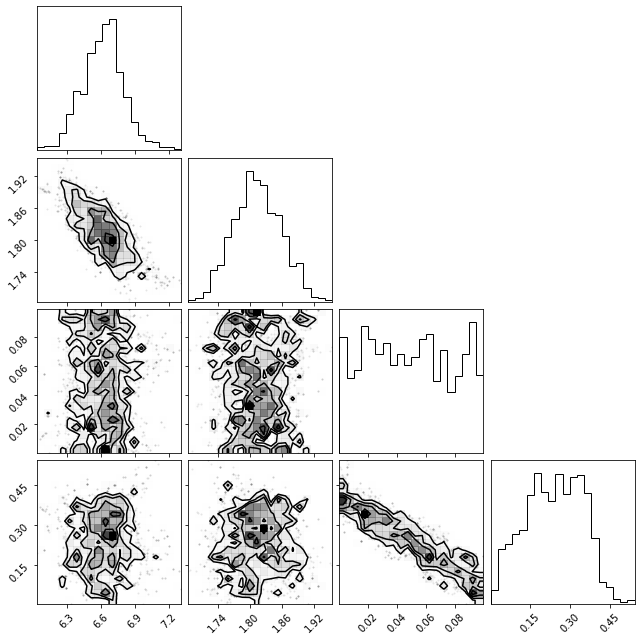

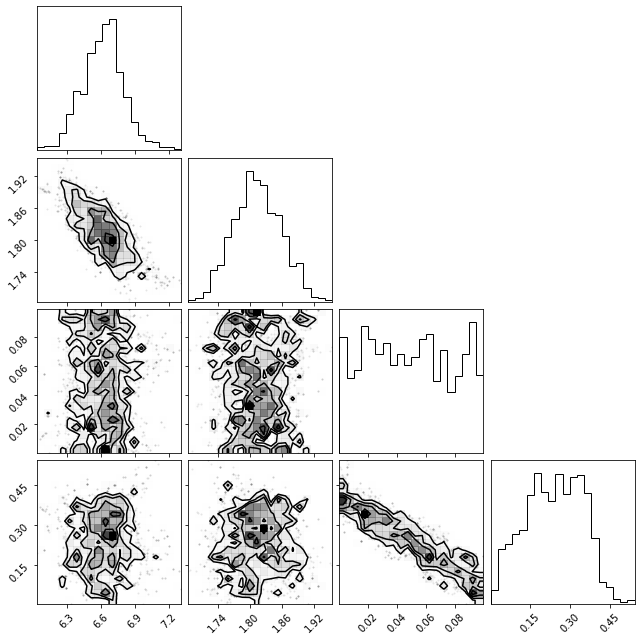

In [132]:
corner.corner(pop[0])

In [94]:
test.pop_like(pop, [0.63, 1.35, 0.07, 1.85, 0.35, 2, 5, 4])

-68.89994448120797

Text(0.5, 0, '$m_1 (M_\\odot)$')

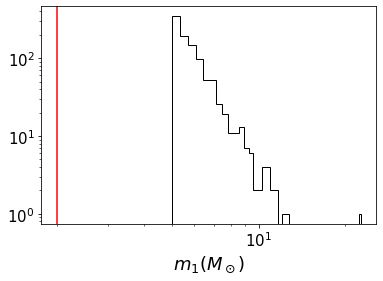

In [124]:
ax = plt.hist(pop[:,:,0], bins=50, histtype='step', color='k')
plt.yscale('log')
plt.xscale('log')
plt.axvline(2, c='r')
plt.xlabel('$m_1 (M_\odot)$')
# plt.xlim(2, 10)

Text(0.5, 0, '$m_1 (M_\\odot)$')

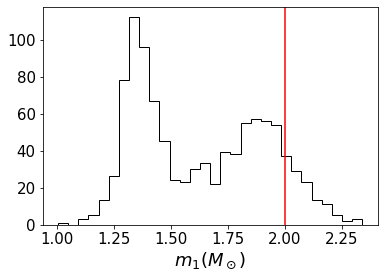

In [126]:
ax = plt.hist(pop[:,:,1], bins=30, histtype='step', color='k')
#plt.yscale('log')
#plt.xscale('log')
plt.axvline(2, c='r')
plt.xlabel('$m_1 (M_\odot)$')
# plt.xlim(2, 10)

(4.0, 10.0)

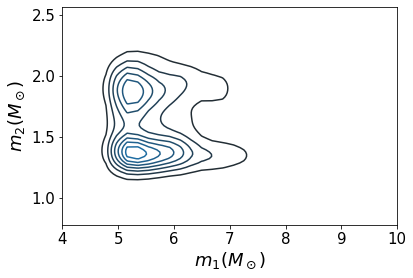

In [127]:
import seaborn
test = seaborn.kdeplot(pop[:,:,0].T[0], pop[:,:,1].T[0])
plt.xlabel('$m_1 (M_\odot)$')
plt.ylabel('$m_2 (M_\odot)$')
plt.xlim(4,10)

In [25]:
test = p.Population([1.4, 0.5, 2, 1, 3, 5, 4], 'nsbh_one', False, selection=True, m1_nospin = True)

vary slope: False
selection: True
spinning: False
no m1 spin: True


In [11]:
p.set_detector("EarlyHigh")

In [12]:
p.interp.ev(2,2)

array(1.88256187)

In [29]:
pop = test.get_population(2, True)

/root/anaconda3/lib/python3.7/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


[5.76610789 5.0879623  2.13729124 ...       -inf 5.11068501 3.5813038 ]
[4.36930813 2.51708288 5.31552602 ... 5.25771996 4.80660331 5.2934666 ]


In [30]:
pop.shape

(2, 3000, 4)

In [110]:
p.fix_params_nsbh({"mu_1": [0.5, -1, 2], "spin_slope":[0.2, 1, 1]}, True, True)

(array([[ 0.  ,  1.  ],
        [-1.  ,  2.  ],
        [ 0.01,  0.5 ],
        [ 1.  ,  2.  ],
        [ 0.01,  0.5 ],
        [ 1.5 ,  2.5 ],
        [ 3.  , 10.  ],
        [ 1.  ,  6.  ],
        [ 0.  ,  0.5 ],
        [ 0.  ,  1.  ],
        [ 1.  ,  1.  ]]),
 array([0.05, 0.  , 0.05, 0.1 , 0.05, 0.1 , 0.2 , 0.2 , 0.05, 0.05, 0.  ]))

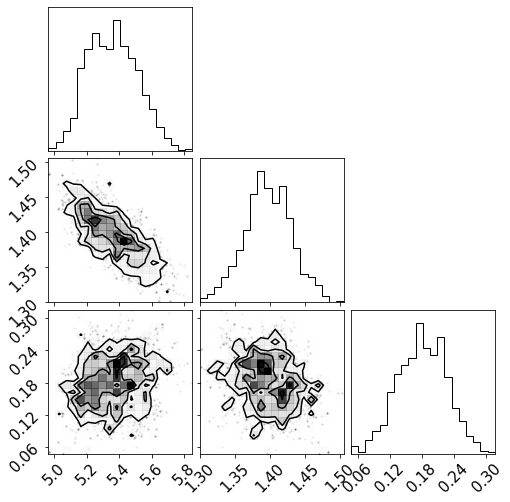

In [100]:
corner.corner(pop[0][:, np.array([0,1,3])]);

In [189]:
p.set_detector("EarlyHigh")

In [208]:
test.pop_like(pop, [1.4, 0.5, 2, 5, 4])

-122.42822432386613

In [176]:
injection_set = np.genfromtxt('./threshold_12_injections.txt')
test.selection_norm([1.4, 0.5, 2, 5, 4], injection_set)

0.05706322175479339

In [ ]:
a, b = test.infer(pop, 100, fixed = {"mu": 1.4, "sigma": 0.5, "m_TOV": 2}, mult=False)

In [42]:
x = np.linspace(1.5, 2.5)
result = np.zeros(50)
for i in range(50):
    result[i] = test.pop_like(pop, [0.63, 1.35, 0.07, x[i], 0.35, 2])

Text(0.5, 0, '$m_1 (M_\\odot)$')

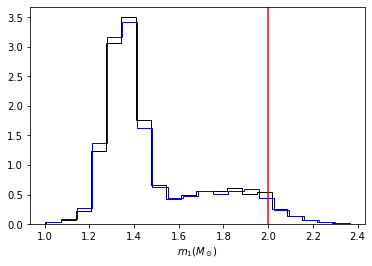

In [198]:
ax = plt.hist(pop[:,:,0], bins=20, histtype='step',density=True, color='k',)
ax = plt.hist(pop2[:,:,0], bins=20, histtype='step',density=True, color='b', )
# plt.yscale('log')
#plt.xscale('log')
plt.axvline(2, c='r')
plt.xlabel('$m_1 (M_\odot)$')
# plt.xlim(2, 10)

Text(0.5, 0, '$m_1 (M_\\odot)$')

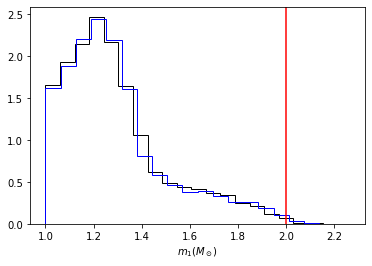

In [199]:
ax = plt.hist(pop[:,:,1], bins=20, histtype='step',density=True, color='k',)
ax = plt.hist(pop2[:,:,1], bins=20, histtype='step',density=True, color='b', )
# plt.yscale('log')
#plt.xscale('log')
plt.axvline(2, c='r')
plt.xlabel('$m_1 (M_\odot)$')
# plt.xlim(2, 10)

Text(0.5, 0, '$m_1 (M_\\odot)$')

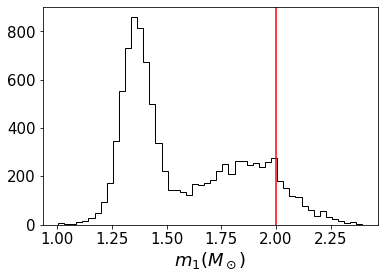

In [39]:
ax = plt.hist(pop[:,:,0], bins=50, histtype='step', color='k')
# plt.yscale('log')
#plt.xscale('log')
plt.axvline(2, c='r')
plt.xlabel('$m_1 (M_\odot)$')
# plt.xlim(2, 10)

Text(0.5, 0, '$m_1 (M_\\odot)$')

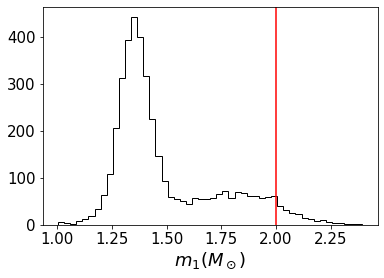

In [40]:
ax = plt.hist(pop[:,:,0], bins=50, histtype='step', color='k', weights=1/pop[:,:,0]**2.2)
# plt.yscale('log')
# plt.xscale('log')
plt.axvline(2, c='r')
plt.xlabel('$m_1 (M_\odot)$')
# plt.xlim(2, 10)

In [581]:
hist, bin_edges = np.histogram(pop[:,:,0], bins=20)

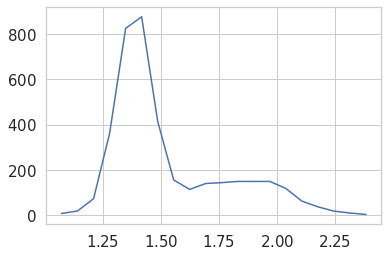

In [582]:
plt.plot(bin_edges[1:], hist/(bin_edges[1:]**2.2))

In [208]:
test = p.Population_Two([0.63, 1.35, 0.07, 1.85, 0.35, 2, 1, 3], vary_slope = False, selection=True)
pop = test.get_population(1000, False)

vary slope: False
selection: True
False


In [453]:
hist, bin_edges = np.histogram(pop[:,:,0], bins=30)

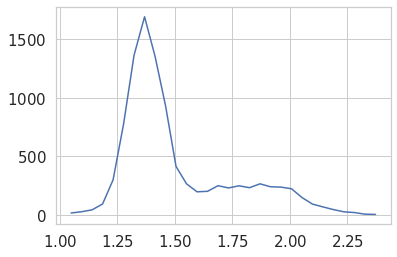

In [454]:
plt.plot(bin_edges[1:], hist)

Text(0.5, 0, '$m_1 (M_\\odot)$')

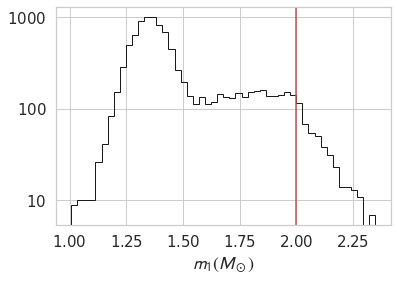

In [417]:
ax = plt.hist(pop[:,:,0], bins=50, histtype='step', color='k')
plt.yscale('log')
#plt.xscale('log')
plt.axvline(2, c='r')
plt.xlabel('$m_1 (M_\odot)$')
# plt.xlim(2, 10)

In [190]:
pop = p.generate_NSBH(1000, [0.63, 1.35, 0.07, 1.85, 0.35, 2, 1, 3, 5, 4, 0.5], nsbh_only = True)

Text(0.5, 0, '$m_1 (M_\\odot)$')

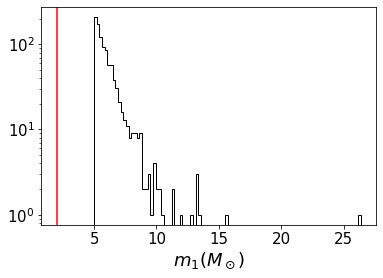

In [193]:
ax = plt.hist(pop[:,0], bins=100, histtype='step', color='k')
plt.yscale('log')
#plt.xscale('log')
plt.axvline(2, c='r')
plt.xlabel('$m_1 (M_\odot)$')
# plt.xlim(2, 10)

Text(0.5, 0, '$m_1 (M_\\odot)$')

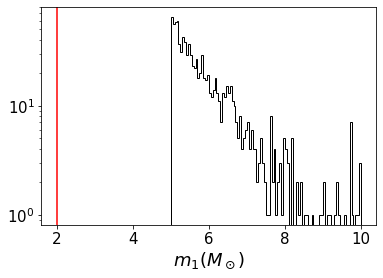

In [12]:
ax = plt.hist(pop[:,0], bins=100, histtype='step', color='k')
plt.yscale('log')
#plt.xscale('log')
plt.axvline(2, c='r')
plt.xlabel('$m_1 (M_\odot)$')

In [39]:
def pl_cdf(x, x_min, alpha):
    return 1-(x/x_min)**(-alpha+1)

In [49]:
def like_plminmax(x, m_min, m_max, alpha):
    result = np.zeros(x.shape[0])
    mask = np.logical_and(x<=m_max, x>=m_min)
    result[mask] = ((alpha-1)/m_min)*(x[mask]/m_min)**(-alpha)/pl_cdf(m_max, m_min, alpha)
    result[~mask] = 0
    return result

In [49]:
def like_plmin(x, m_min, alpha):
    result = np.zeros(x.shape[0])
    mask = x>=m_min
    result[mask] = ((alpha-1)/m_min)*(x[mask]/m_min)**(-alpha)
    result[~mask] = 0
    return result

In [94]:
def like_plminmax_one(x, m_min, m_max, alpha):
    if x < m_max and x > m_min:
        return ((alpha-1)/m_min)*(x/m_min)**(-alpha)/pl_cdf(m_max, m_min, alpha)
    return 0

In [57]:
def like_plmin_one(x, m_min, alpha):
    if x > m_min:
        return ((alpha-1)/m_min)*(x/m_min)**(-alpha)
    return 0

In [51]:
def like_beta(x, beta):
    result = np.zeros(x.shape[0])
    mask = np.logical_and(x<=1, x>0)
    result[mask] = x[mask]**beta*(beta+1)
    return result

In [58]:
def like_beta_one(x, beta):
    if x <=1 and x >= 0:
        return x**beta*(beta+1)
    return result

In [50]:
x = np.linspace(5, 50, 1000)
np.trapz(like_plmin(x, 5, 5), x)

1.0000352625861446

In [102]:
def like_m1m2(m_1, m_2, m_min, m_max, alpha, beta, mu, sigma, m_TOV, lower=1):
    p_m1 = like_plminmax(m_1, m_min, m_max, alpha)
    p_m2 = p.truncnormal_like(m_2, mu, sigma, lower, m_TOV)
    q = m_2/m_1
    p_q = like_beta(q, beta)
    # print(np.trapz(p_q, q))
    # print(np.trapz(p_m2, m_2))
    normalize_q2 = m_max - lower # normalize so it integrates to 1 over all possible m_2
    return p_m1 * p_m2 * p_q / normalize_q2

In [181]:
# do I need a maximum size, or will q take care of it?

In [146]:
m1 = np.array([12])
m2s = np.linspace(1, 12, 1000)
np.trapz(like_m1m2(m1, m2s, 5, 13, 3, 3, 1.4, 0.5, 2), m2s)

0.000723379774595342
0.9999997693632132


2.29541222025391e-05

In [142]:
like_plminmax_one(m1, 5, 13, 3)

array([0.03395865])

In [ ]:
like_m1m2(pop[:,0], pop[:,1], )

In [14]:
# params: a_ns2, mu1, sigma1, mu2, sigma2, m_TOV, max_jjkep, beta, bh_min, bh_slope, spin slope
pop = p.generate_NSBH(1000, [0.63, 1.35, 0.07, 1.85, 0.35, 2, 1, 3, 5, 2, 0.4], nsbh_only = True, vary_slope = True)

Text(0.5, 0, '$m_1 (M_\\odot)$')

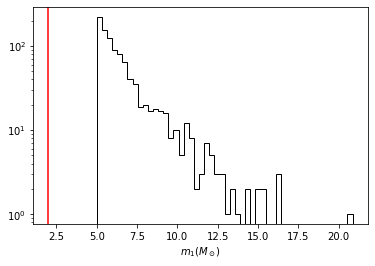

In [15]:
ax = plt.hist(pop[:,0], bins=50, histtype='step', color='k')
plt.yscale('log')
#plt.xscale('log')
plt.axvline(2, c='r')
plt.xlabel('$m_1 (M_\odot)$')

Text(0.5, 0, '$m_2 (M_\\odot)$')

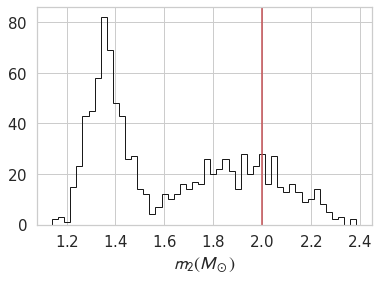

In [273]:
ax = plt.hist(pop[:,1], bins=50, histtype='step', color='k')
# plt.yscale('log')
#plt.xscale('log')
plt.axvline(2, c='r')
plt.xlabel('$m_2 (M_\odot)$')

Text(0.5, 0, '$m_2 (M_\\odot)$')

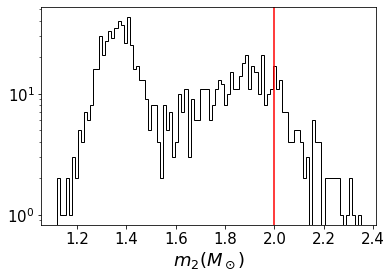

In [13]:
ax = plt.hist(pop[:,1], bins=100, histtype='step', color='k')
plt.yscale('log')
#plt.xscale('log')
plt.axvline(2, c='r')
plt.xlabel('$m_2 (M_\odot)$')

Text(0, 0.5, '$m_2 (M_\\odot)$')

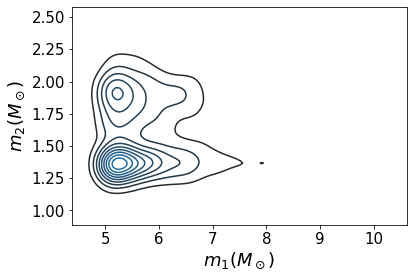

In [147]:
import seaborn
test = seaborn.kdeplot(pop[:,0], pop[:,1])
plt.xlabel('$m_1 (M_\odot)$')
plt.ylabel('$m_2 (M_\odot)$')

In [96]:
results = np.zeros((50,50))
m1s = np.linspace(5,10)
m2s = np.linspace(1, 2.5)
spins = np.random.rand(50,50)
for i in range(50):
    for j in range(50):
        if m1s[j] > m2s[i]:
            result = p.two_truncnormal_like_one(m2s[i], 0.0, 1.35, 0.07, 1.85, 0.35, 1, p.m_crit(2, spins[i,j]))
            result *= like_plmin_one(m1s[j], 5, 4)
            result *= like_beta_one(m2s[i]/m1s[j], 3)
            results[i,j] = result

In [146]:
def like_m1m2_one(samples, params):
    # params: a, mu_1, sigma_1, mu_2, sigma_2, m_TOV, bh_min, bh_slope, slope (optional)
    
    p_m1 = like_plmin_one(samples[0], params[6], params[7])
    p_m2 = p.two_truncnormal_like_one(samples[1], a = params[0], mu_1 = params[1], sigma_1 = params[2], \
                                      mu_2 = params[3], sigma_2 = params[4], lower = 1, upper = p.m_crit(params[5], samples[3]))
    q = samples[1]/samples[0]
    p_q = like_beta_one(q, 3)
    # print(np.trapz(p_q, q))
    # print(np.trapz(p_m2, m_2))
    # normalize_q2 = m_max - lower # normalize so it integrates to 1 over all possible m_2
    return p_m1 * p_m2 * p_q # / normalize_q2

In [305]:
results = np.zeros((50,50))
m1s = np.linspace(5,10)
m2s = np.linspace(1, 2.5)
spins = np.random.rand(50,50)
for i in range(50):
    for j in range(50):
        if m1s[j] > m2s[i]:
            results[i,j] = like_m1m2_one([m1s[j], m2s[i], np.random.rand(), np.random.rand()], [0.5, 1.35, 0.07, 1.85, 0.35, 2.0, 5.0, 4.0])

In [225]:
test = p.Population_SpinDist([0.63, 1.35, 0.07, 1.85, 0.35, 2, 1, 3, 5, 4], 'nsbh', False, selection=False)

vary slope: False
selection: False


In [252]:
test = p.Population_NSBH([0.63, 1.35, 0.07, 1.85, 0.35, 2, 1, 3, 5, 4], False, selection=False)

vary slope: False
selection: False
False


In [328]:
pop = test.get_population(200, samples=False)

In [275]:
test.pop_like(pop, [0.5, 1.35, 0.07, 1.85, 0.35, 2.0, 5.0, 4.0])

-345.4926857116193

In [331]:
result = np.zeros(50)
slopes = np.linspace(1.2, 1.5)
for i in range(50):
    result[i] = test.pop_like(pop, [0.5, slopes[i], 0.07, 1.85, 0.35, 2.0, 5.0, 4])

In [212]:
result = np.zeros(50)
slopes = np.linspace(2, 6)
for i in range(50):
    result[i] = test.pop_like(pop, [1.4, 0.5, 2, 5.0, slopes[i]])

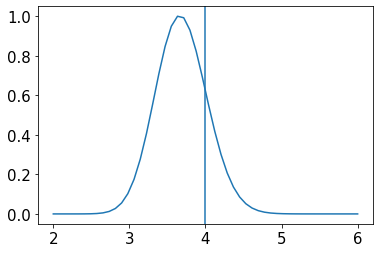

In [213]:
plt.plot(slopes, np.exp(result-np.max(result)))
plt.axvline(4)

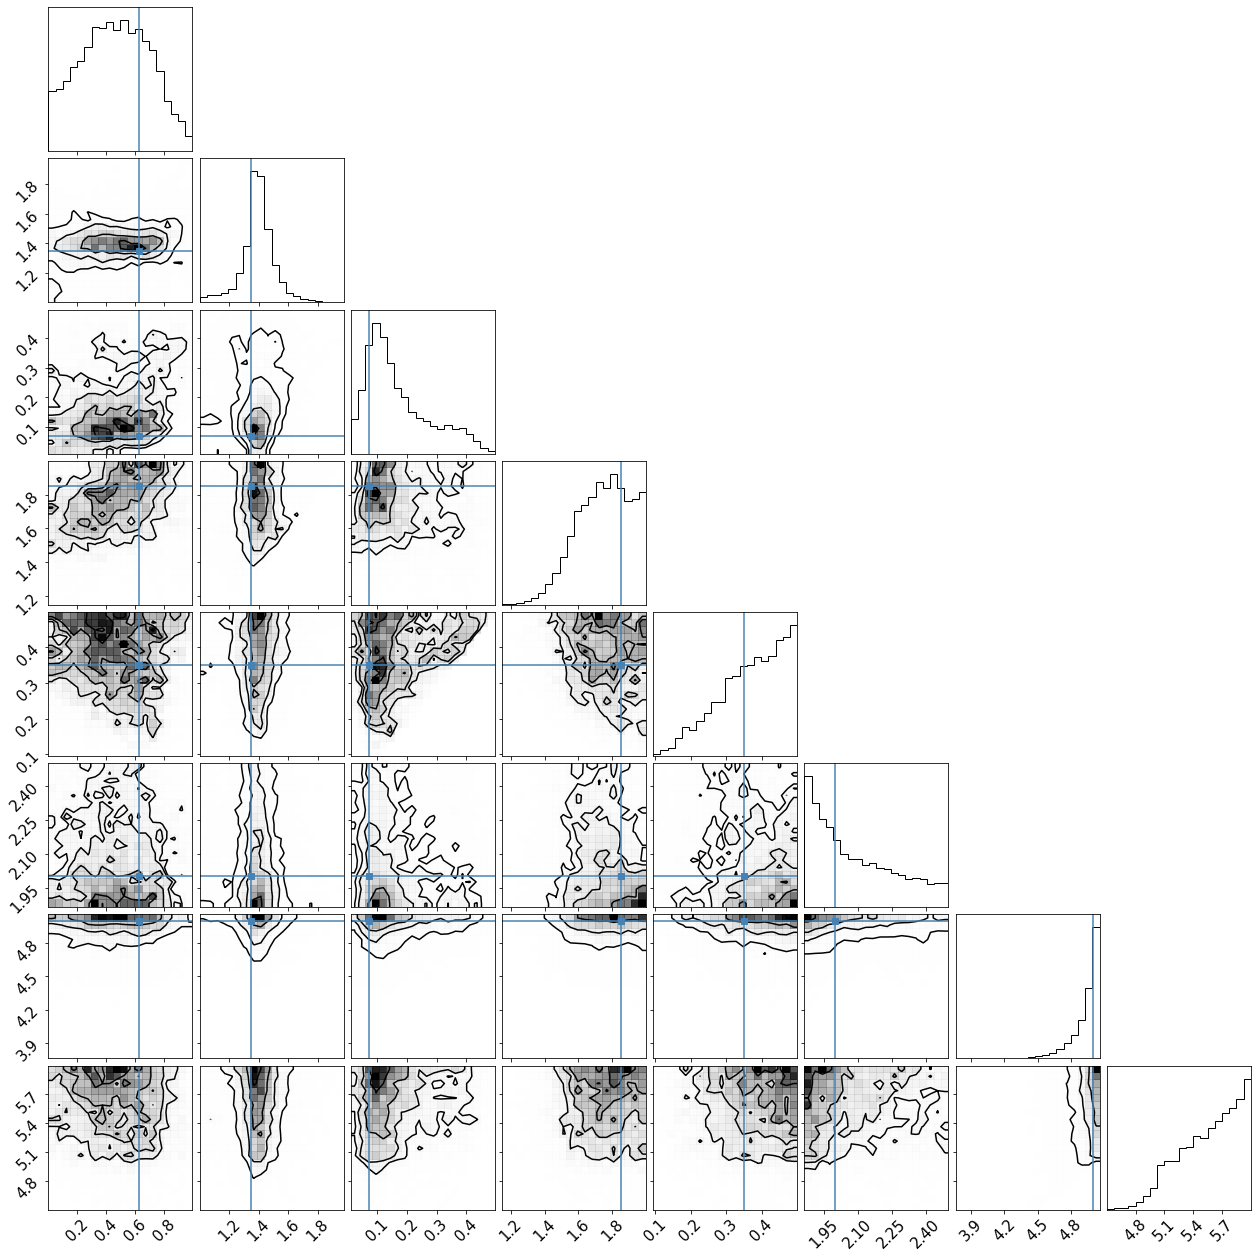

In [257]:
corner.corner(a[a[:,7]>4.5], plot_datapoints=False, truths=[0.63, 1.35, 0.07, 1.85, 0.35, 2.0, 5.0, 4.0]);

In [159]:
results = np.zeros((50,50))
m1s = np.linspace(5,10)
m2s = np.linspace(1, 2.5)
spins = np.random.rand(50,50)
for i in range(50):
    for j in range(50):
        if m1s[j] > m2s[i]:
            results[i,j] = test.event_likelihood_nsbh_single(np.array([[m1s[j], m2s[i], np.random.rand(), np.random.rand()]]), [0.5, 1.35, 0.07, 1.85, 0.35, 2.0, 5.0, 4.0])

In [23]:
N = 500
results = np.zeros((N,N))
m1s = np.linspace(3, 30,N)
m2s = np.linspace(1, 3,N)
spins = np.random.rand(N,N)

for i in range(N):
    for j in range(N):
        if m1s[j] > m2s[i]:
            results[i,j] = p_inject_one(m1s[j], m2s[i])

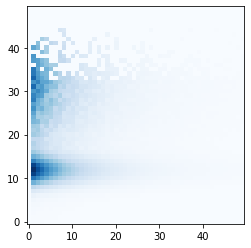

In [160]:
plt.imshow(results, cmap='Blues', origin='lower')

In [161]:
np.trapz(np.trapz(results, x=m1s, axis=1), x=m2s)

0.060782921313393266

In [77]:
test = p.Population([0.63, 1.35, 0.07, 1.85, 0.35, 2, 1, 3, 5, 4, 10], "nsbh")

vary slope: False
selection: False
spinning: False


In [47]:
test = p.Population_Two_Spinning([0.63, 1.35, 0.07, 1.85, 0.35, 2, 1, 3, 5, 4], spin_params=[0.5])

vary slope: False
selection: False
spinning: True
False


In [48]:
sampl = test.get_population(10, False)

Text(0.5, 0, '$m_2 (M_\\odot)$')

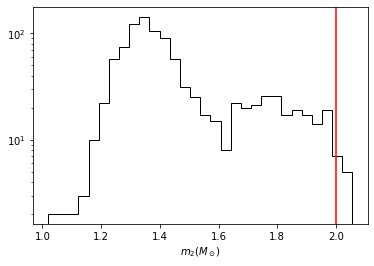

In [31]:
ax = plt.hist(sampl[:,:,0], bins=30, histtype='step', color='k')
plt.yscale('log')
#plt.xscale('log')
plt.axvline(2, c='r')
plt.xlabel('$m_2 (M_\odot)$')

In [49]:
test.pop_like(sampl, [0.63, 1.35, 0.07, 1.85, 0.35, 2, 0.5])

21.79047211737815

In [ ]:
test.infer(sampl, 500)

old version of generate_NSBH

In [555]:
pop = generate_NSBH(10000, [0.63, 1.35, 0.07, 1.85, 0.35, 2, 1, 3, 5, 4, 10, 0.5])

Text(0.5, 0, '$m_1 (M_\\odot)$')

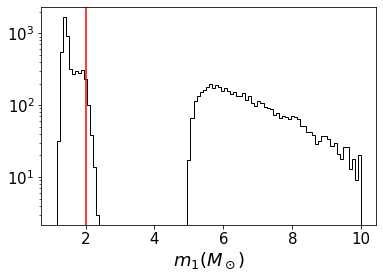

In [556]:
ax = plt.hist(pop[:,0], bins=100, histtype='step', color='k')
plt.yscale('log')
#plt.xscale('log')
plt.axvline(2, c='r')
plt.xlabel('$m_1 (M_\odot)$')

Text(0.5, 0, '$m_2 (M_\\odot)$')

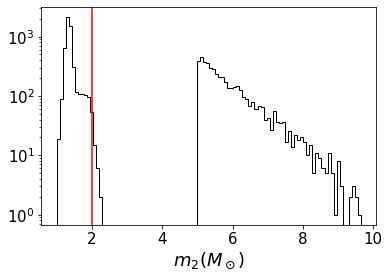

In [557]:
ax = plt.hist(pop[:,1], bins=100, histtype='step', color='k')
plt.yscale('log')
#plt.xscale('log')
plt.axvline(2, c='r')
plt.xlabel('$m_2 (M_\odot)$')

Text(0, 0.5, '$m_2 (M_\\odot)$')

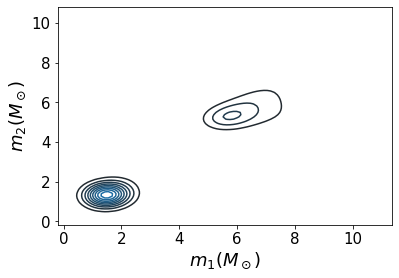

In [558]:
seaborn.kdeplot(pop[:,0], pop[:,1])
plt.xlabel('$m_1 (M_\odot)$')
plt.ylabel('$m_2 (M_\odot)$')

# Looking at Posterior Samples

In [246]:
%matplotlib inline
import pesummary
from pesummary.io import read
print(pesummary.__version__)

0.9.1


In [247]:
file_name = 'GW200115_042309_posterior_samples_v2.h5'
data = read(file_name)

In [250]:
#samples_dict = data.samples_dict
print(samples_dict.keys())

dict_keys(['C01:Combined_NSBH_low_spin', 'C01:Combined_PHM_high_spin', 'C01:Combined_PHM_low_spin', 'C01:PhenomNSBH_low_spin', 'C01:PhenomXAS_a1_lessthan_0point5_low_spin', 'C01:PhenomXAS_low_spin', 'C01:PhenomXHM_a1_lessthan_0point5_low_spin', 'C01:PhenomXHM_high_spin', 'C01:PhenomXHM_low_spin', 'C01:PhenomXPHM_high_spin', 'C01:PhenomXPHM_low_spin', 'C01:SEOBNRv4HM_a1_lessthan_0point5_low_spin', 'C01:SEOBNRv4HM_high_spin', 'C01:SEOBNRv4HM_low_spin', 'C01:SEOBNRv4NSBH_a1_lessthan_0point5_low_spin', 'C01:SEOBNRv4NSBH_low_spin', 'C01:SEOBNRv4PHM_high_spin', 'C01:SEOBNRv4PHM_low_spin', 'C01:SEOBNRv4_a1_lessthan_0point5_low_spin', 'C01:SEOBNRv4_low_spin'])


In [251]:
posterior_samples = samples_dict['C01:Combined_PHM_high_spin']
parameters = list(posterior_samples.keys())
print(parameters)

['psi', 'mass_ratio', 'mass_2_source', 'spin_2y', 'chirp_mass', 'luminosity_distance', 'symmetric_mass_ratio', 'tilt_2', 'dec', 'iota', 'mass_1_source', 'phi_jl', 'mass_1', 'a_2', 'total_mass', 'chi_eff', 'radiated_energy', 'cos_iota', 'spin_1z', 'cos_tilt_2', 'ra', 'spin_1x', 'phi_12', 'chirp_mass_source', 'peak_luminosity', 'final_mass', 'a_1', 'spin_2z', 'phase', 'inverted_mass_ratio', 'phi_1', 'final_spin', 'comoving_distance', 'redshift', 'cos_tilt_1', 'cos_theta_jn', 'spin_1y', 'total_mass_source', 'chi_p', 'geocent_time', 'spin_2x', 'final_mass_source', 'phi_2', 'tilt_1', 'log_likelihood', 'theta_jn', 'mass_2']


In [266]:
np.vstack([posterior_samples['mass_1_source'],
           posterior_samples['mass_2_source'],
           posterior_samples['a_1'],
           posterior_samples['a_2']]).T

array([[4.63391569, 1.6384063 , 0.59511034, 0.84886125],
       [5.73221847, 1.48571592, 0.61179674, 0.72384507],
       [6.27705374, 1.34919922, 0.31002065, 0.59941306],
       ...,
       [4.87480358, 1.64728763, 0.41231324, 0.41128201],
       [6.58584113, 1.37836824, 0.01129364, 0.4269689 ],
       [7.62977064, 1.07877089, 0.24313174, 0.06003181]])

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


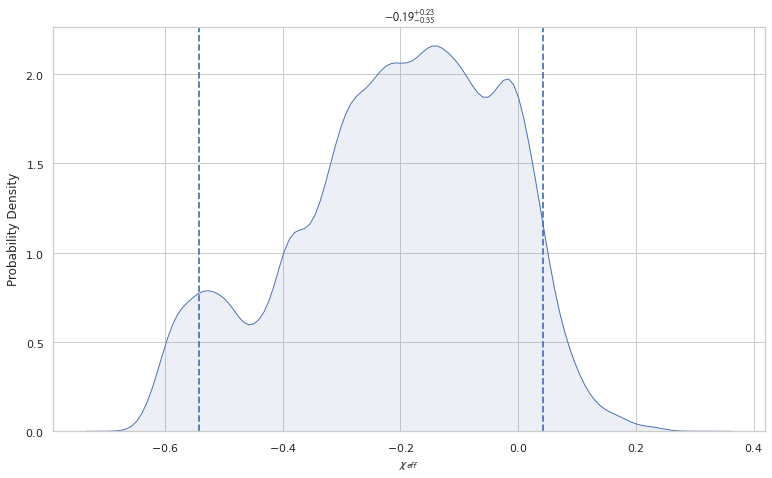

In [252]:
fig = posterior_samples.plot('chi_eff', type='hist', kde=True)
fig.set_size_inches(12, 8)
fig.show()

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


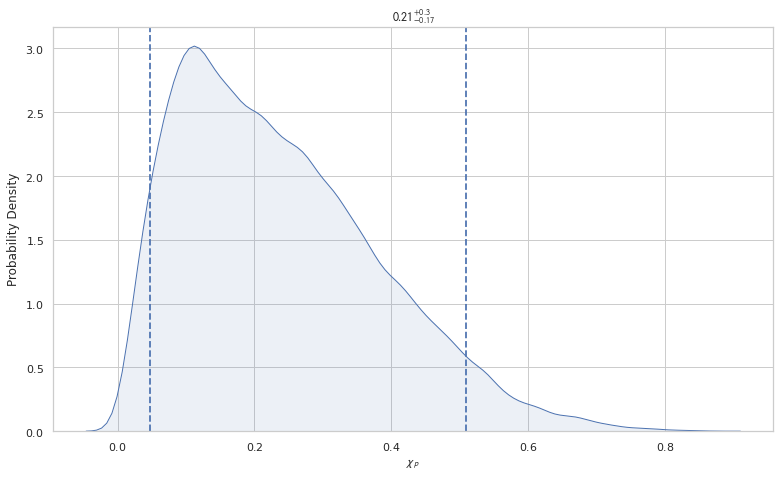

In [253]:
fig = posterior_samples.plot('chi_p', type='hist', kde=True)
fig.set_size_inches(12, 8)
fig.show()

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


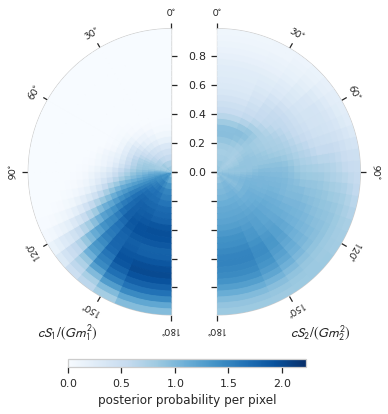

In [254]:
fig = posterior_samples.plot(type='spin_disk', colorbar=True, annotate=False, show_label=True, cmap='Blues')
fig.show()

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


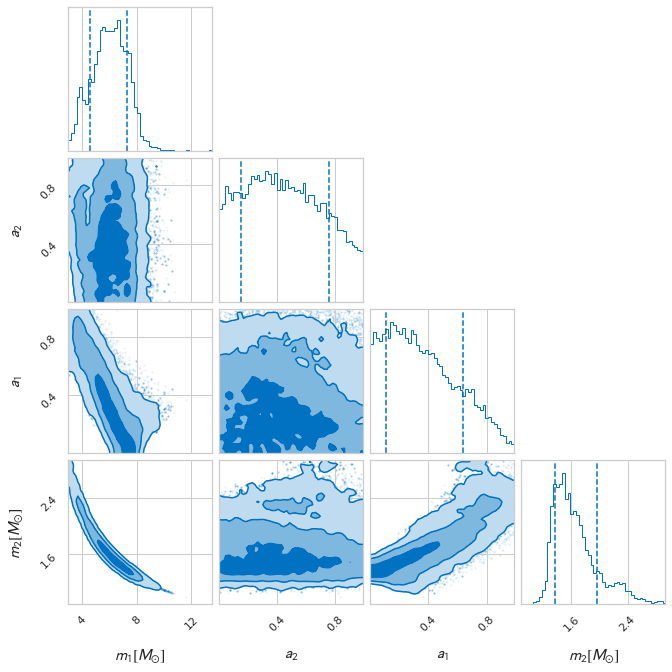

In [255]:
fig = posterior_samples.plot(type='corner', parameters=['mass_1', 'mass_2', 'a_1', 'a_2'])
fig.show()

In [256]:
samples_dict_downsampled = dict(
    (key, samples_dict[key]) for key in
    ["C01:Combined_PHM_high_spin", "C01:PhenomXPHM_high_spin", "C01:SEOBNRv4PHM_high_spin"])
samples_dict_downsampled = pesummary.utils.samples_dict.MultiAnalysisSamplesDict(samples_dict_downsampled)

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


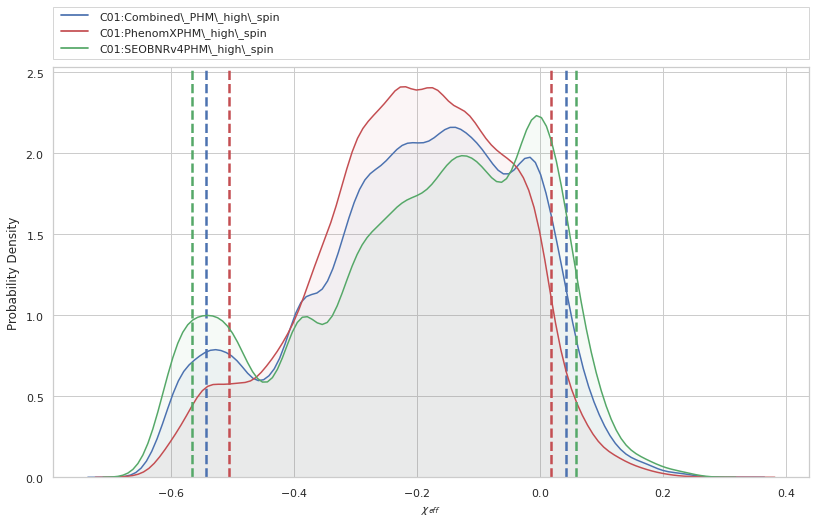

In [258]:
fig = samples_dict_downsampled.plot('chi_eff', type='hist', kde=True)
fig.set_size_inches(12, 8)
fig.show()

# Looking at Selection Effects

In [275]:
!ls

10sample_novaryslope_maxspin_chain.txt	 __pycache__
10sample_varyslope_maxspin_chain.txt	 clean_populations.ipynb
5event_chain.txt			 onepeaked_withspin.h5
GW190814_posterior_samples.h5		 population_generation.ipynb
GW200105_162426_posterior_samples_v2.h5  populations.py
GW200115_042309_posterior_samples_v2.h5  test.py
SensitivityTutorial.ipynb.txt		 unused_populations.py


In [276]:
!mv SensitivityTutorial.ipynb.txt SensitivityTutorial.ipynb